In [2]:
from google.colab import files
uploaded = files.upload()

Saving Employe_Performance_dataset.csv to Employe_Performance_dataset.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB
None


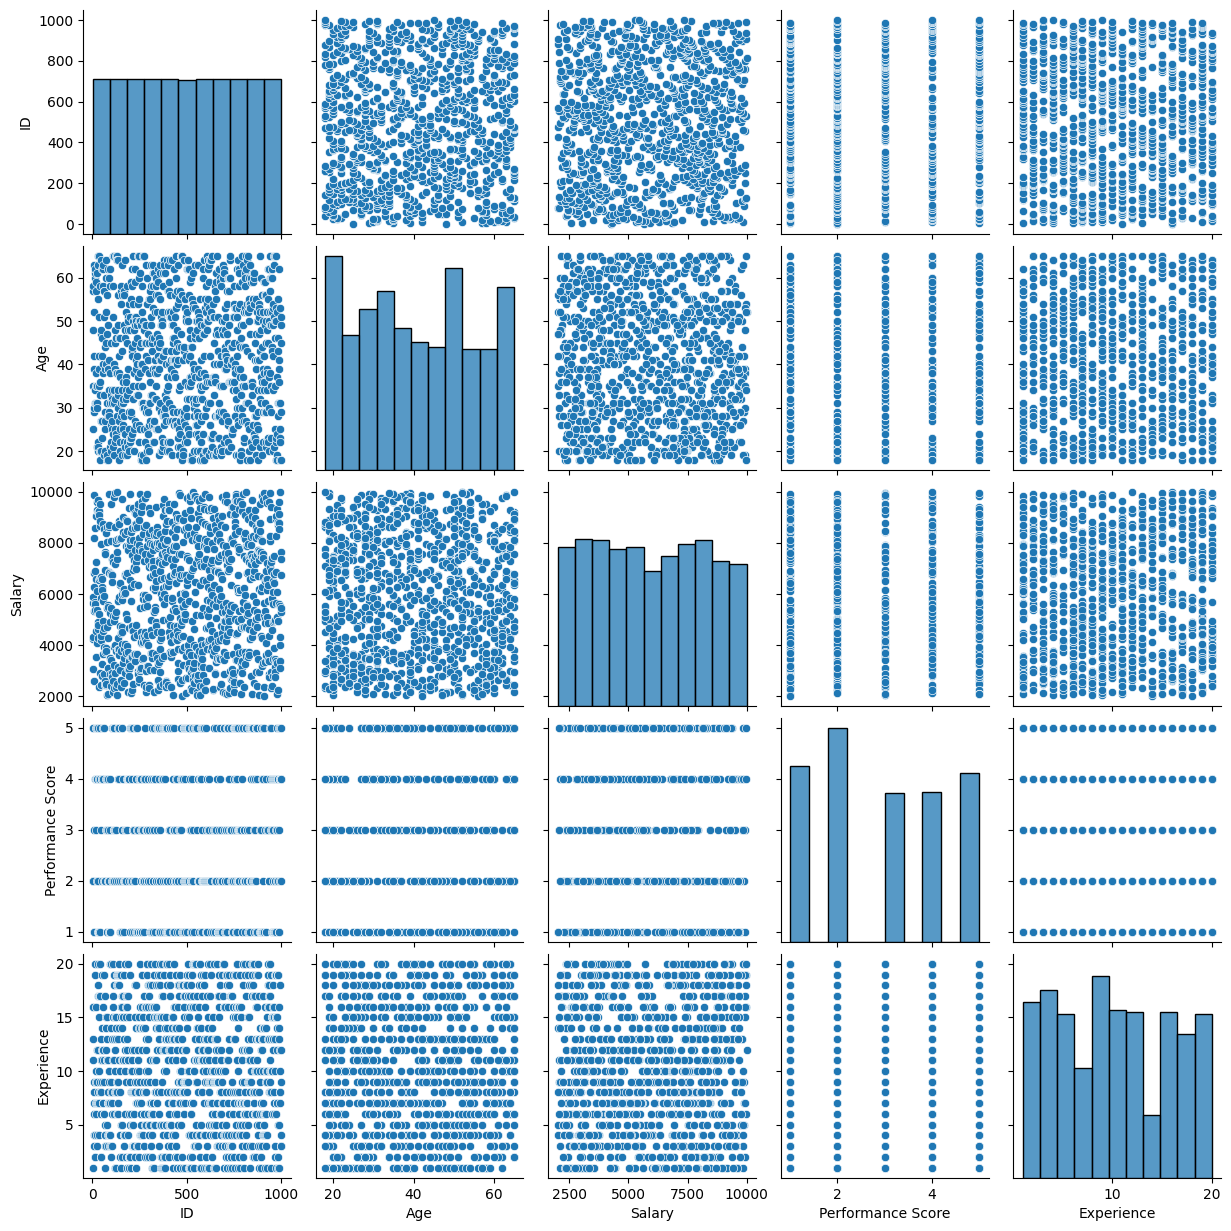

Mean Squared Error: 5395178.059320891
R-squared: -813.6378387945036


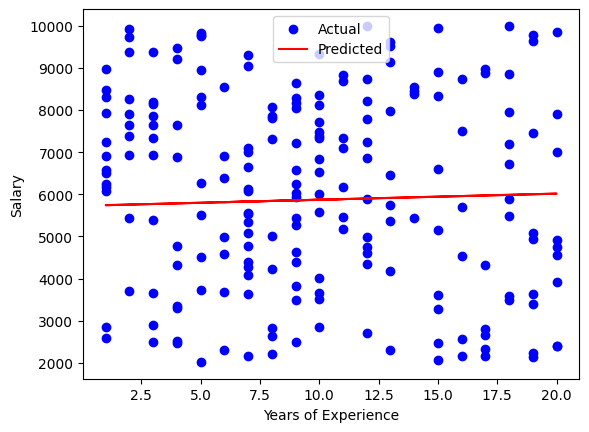

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #model selcetion is for train test split
from sklearn.linear_model import LinearRegression  #say what algo we are gonna use
from sklearn.metrics import mean_squared_error,r2_score #metrics to measure

df = pd.read_csv("Employe_Performance_dataset.csv")
# print(df.head())

print(df.info()) #to know deatils of dataframe

df.isnull().sum

sns.pairplot(df)
plt.show()  #in vs code only when i do plt.show it shows


df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

x=df[["Experience"]]
y=df["Salary"]

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)

preds = model.predict(x_test)

mse = mean_squared_error(preds,y_test)

r2 = r2_score(preds,y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


# Plot actual vs predicted values
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, preds, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()